First we import all necessary libraries

In [36]:
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go
import chart_studio.plotly as py
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
from dash import Dash, Input, Output, callback, dash_table
from plotly.subplots import make_subplots
import dash_bootstrap_components as dbc
import seaborn as sns

# Data preperation and cleaning
As a first step the data is read in as a csv file.

In [37]:
data = pd.read_csv("Testdaten_Generali_all_tested_systems.csv", sep = ";")

In [38]:
data.head()

,TESTFALLNAME,RESULTAT,DURCHFÜHRUNGSDAUER,DATUM,ANWENDUNG
0,RRS_VL-Überprüfen(GesperrteAL-WeiterVerteilen),OK,2022-04-12-00.03.47.000000,2022-04-12-17.13.18.000000,EMA Basis
1,RRS_VL-Überprüfen(GesperrteAL-NichtVerteilen),OK,2022-04-12-00.02.45.000000,2022-04-12-17.09.30.000000,EMA Basis
2,RRS_VL-Überprüfen(GesperrteAL-AnStvVerteilen),OK,2022-04-12-00.04.14.000000,2022-04-12-17.06.44.000000,EMA Basis
3,Init FRVIT/VITFRAINT,OK,2022-04-12-00.00.04.000000,2022-04-12-17.02.30.000000,EMA Basis
4,"RRS_AuswertRT-Überprüfen(KMA-oV) [AT,Vitality]",OK,2022-04-12-00.02.11.000000,2022-04-12-17.01.12.000000,EMA Basis


As we want to be able to add various different data, we change the column names, so that we can assure they stay the same. The old name of the columns will vary from data to data and will need to be adapted. 

In [39]:
data = data.rename(columns={"ANWENDUNG":"system", "TESTFALLNAME":"testname", "RESULTAT":"result", "DATUM":"date", "DURCHFÜHRUNGSDAUER":"runtime"})
data.head()

,testname,result,runtime,date,system
0,RRS_VL-Überprüfen(GesperrteAL-WeiterVerteilen),OK,2022-04-12-00.03.47.000000,2022-04-12-17.13.18.000000,EMA Basis
1,RRS_VL-Überprüfen(GesperrteAL-NichtVerteilen),OK,2022-04-12-00.02.45.000000,2022-04-12-17.09.30.000000,EMA Basis
2,RRS_VL-Überprüfen(GesperrteAL-AnStvVerteilen),OK,2022-04-12-00.04.14.000000,2022-04-12-17.06.44.000000,EMA Basis
3,Init FRVIT/VITFRAINT,OK,2022-04-12-00.00.04.000000,2022-04-12-17.02.30.000000,EMA Basis
4,"RRS_AuswertRT-Überprüfen(KMA-oV) [AT,Vitality]",OK,2022-04-12-00.02.11.000000,2022-04-12-17.01.12.000000,EMA Basis


Next we want to verify, if we have any null values and if so, in which column those null values are, and how many null values we have

In [40]:
data.isna().any()

testname    False
result      False
runtime      True
date        False
system      False
dtype: bool

In [41]:
data['runtime'].isnull().sum()

18107

As a certain amount of data is needed per tested system, we check which tested systems have less then 3000 records. 

In [42]:
len(data['system'].unique())

26

In [43]:
for i in data['system'].unique():
    if (len(data.loc[(data['system'] == i)]) < 3000):
        print (i)

Plattform
EVA
EMA Cockpit
ECM
GATE_Paket
eVtg Vertrag
TZIT Tools
Projekt B
Projekt A
Internet
KI Online


In [44]:
for i in data['system'].unique():
    print (i , len(data.loc[(data['system'] == i)]))

EMA Basis 44458
EMA PKA 10032
VITALITY 3913
EVS 27139
Betriebliche Vorsorge 6887
VISLife AUT Neu 23676
SLS 7061
VIS Portal 16714
eVtg 48731
Plattform 461
VISLife CEE 4243
PA 5293
ERV 12703
Kundenportal 5128
DM 18568
TCM 8741
EVA 2505
EMA Cockpit 533
ECM 838
GATE_Paket 7
eVtg Vertrag 457
TZIT Tools 9
Projekt B 3
Projekt A 1
Internet 51
KI Online 97


After evaluating tested systems with little records, we can eleiminate those tested systems as well as two tested systems that are not included due to authorizational reasons. 

In [45]:
remove_system = ['DM', 'TCM', 'Kundenportal', 'EMA Basis', 'EMA PKA', 'Betriebliche Vorsorge']

for i in data['system'].unique():
    if (len(data.loc[(data['system'] == i)]) < 3000):
        remove_system.append(i)

data = data[data['system'].isin(remove_system) == False]
len(data['system'].unique())

9

In [46]:
data.head()

,testname,result,runtime,date,system
22,03_Bestandspartner_Kundenportal Erstanmeldung,OK,2022-04-12-00.00.35.000000,2022-04-12-16.25.05.000000,VITALITY
23,02_Bestandspartner_Kundenportal Erstanmeldung,OK,2022-04-12-00.00.35.000000,2022-04-12-16.24.30.000000,VITALITY
24,01_Bestandspartner_Kundenportal Erstanmeldung,OK,2022-04-12-00.00.45.000000,2022-04-12-16.23.55.000000,VITALITY
26,!!!MH_07_Kundenportal_Registrierung_manuell,OK,NaN,2022-04-12-16.22.26.719510,EVS
30,!!!MH_06_Schaden_mit_Status_erledigt_manuell,OK,NaN,2022-04-12-16.18.49.189875,EVS


In [47]:
len(data)

149473

In [48]:
data['runtime'].isnull().sum()

7731

In [49]:
data = data.dropna()
data.head()

,testname,result,runtime,date,system
22,03_Bestandspartner_Kundenportal Erstanmeldung,OK,2022-04-12-00.00.35.000000,2022-04-12-16.25.05.000000,VITALITY
23,02_Bestandspartner_Kundenportal Erstanmeldung,OK,2022-04-12-00.00.35.000000,2022-04-12-16.24.30.000000,VITALITY
24,01_Bestandspartner_Kundenportal Erstanmeldung,OK,2022-04-12-00.00.45.000000,2022-04-12-16.23.55.000000,VITALITY
36,!!!DAZ_Vitality_TZIT50_BuF_mit_VersBon_EV,FAILED,2022-04-12-00.04.18.000000,2022-04-12-16.13.40.000000,EVS
89,10_Bestandspartner_Kundenportal Erstanmeldung,OK,2022-04-12-00.00.40.000000,2022-04-12-15.29.04.000000,VITALITY


The columns result and system can be anaylsed based on their frequency

In [50]:
result_distribution = data.groupby('result').size()
result_distribution

result
FAILED           1520
FAILED_GATE      5037
OK             133893
OPEN              528
SKIPPED           690
TOUCHED            74
dtype: int64

<AxesSubplot:xlabel='result'>

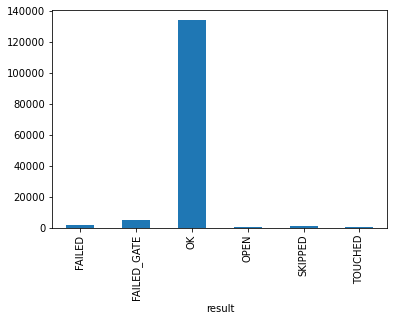

In [51]:
result_distribution.plot.bar()

In [52]:
system_distribution = data.groupby('system').size()
system_distribution

system
ERV                12438
EVS                25174
PA                  4984
SLS                 6022
VIS Portal         16663
VISLife AUT Neu    21903
VISLife CEE         4231
VITALITY            1963
eVtg               48364
dtype: int64

<AxesSubplot:xlabel='system'>

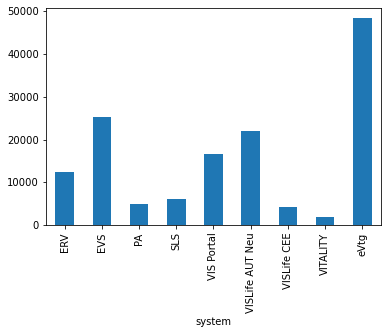

In [53]:
system_distribution.plot.bar()

To look at outliers for the columns date and runtime, the data types of runtime and date need to be adapted

In [54]:
count = 0

for index, row in data.iterrows():
    row['date'] = row['date'][:-16]
    row['runtime'] = row ['runtime'][11:]
    count += 1

data.head(10)

,testname,result,runtime,date,system
22,03_Bestandspartner_Kundenportal Erstanmeldung,OK,00.00.35.000000,2022-04-12,VITALITY
23,02_Bestandspartner_Kundenportal Erstanmeldung,OK,00.00.35.000000,2022-04-12,VITALITY
24,01_Bestandspartner_Kundenportal Erstanmeldung,OK,00.00.45.000000,2022-04-12,VITALITY
36,!!!DAZ_Vitality_TZIT50_BuF_mit_VersBon_EV,FAILED,00.04.18.000000,2022-04-12,EVS
89,10_Bestandspartner_Kundenportal Erstanmeldung,OK,00.00.40.000000,2022-04-12,VITALITY
90,09_Bestandspartner_Kundenportal Erstanmeldung,OK,00.00.38.000000,2022-04-12,VITALITY
92,08_Bestandspartner_Kundenportal Erstanmeldung,OK,00.00.36.000000,2022-04-12,VITALITY
95,EVA_GFM_Polizzierung_prüfen [SUB],OK,00.00.44.000000,2022-04-12,EVS
96,DAZ_Datenübertragung_KFZ_Testvermittler_UAV_VI...,OK,00.02.22.000000,2022-04-12,EVS
97,07_Bestandspartner_Kundenportal Erstanmeldung,OK,00.00.37.000000,2022-04-12,VITALITY


In [55]:
data['result'].loc[(data['result'] != 'OK')] = 0
data['result'].loc[(data['result'] == 'OK')] = 1
data.head()

,testname,result,runtime,date,system
22,03_Bestandspartner_Kundenportal Erstanmeldung,1,00.00.35.000000,2022-04-12,VITALITY
23,02_Bestandspartner_Kundenportal Erstanmeldung,1,00.00.35.000000,2022-04-12,VITALITY
24,01_Bestandspartner_Kundenportal Erstanmeldung,1,00.00.45.000000,2022-04-12,VITALITY
36,!!!DAZ_Vitality_TZIT50_BuF_mit_VersBon_EV,0,00.04.18.000000,2022-04-12,EVS
89,10_Bestandspartner_Kundenportal Erstanmeldung,1,00.00.40.000000,2022-04-12,VITALITY


In [56]:
data = data.astype({"result": "bool", "date":"datetime64"})
data["runtime"] = pd.to_datetime(data["runtime"], format= "%H.%M.%S.%f").dt.time
data["date"] = pd.to_datetime(data["date"], format= "%Y-%M-%D").dt.date
data.head()

,testname,result,runtime,date,system
22,03_Bestandspartner_Kundenportal Erstanmeldung,True,00:00:35,2022-04-12,VITALITY
23,02_Bestandspartner_Kundenportal Erstanmeldung,True,00:00:35,2022-04-12,VITALITY
24,01_Bestandspartner_Kundenportal Erstanmeldung,True,00:00:45,2022-04-12,VITALITY
36,!!!DAZ_Vitality_TZIT50_BuF_mit_VersBon_EV,False,00:04:18,2022-04-12,EVS
89,10_Bestandspartner_Kundenportal Erstanmeldung,True,00:00:40,2022-04-12,VITALITY


In [57]:
min = data['runtime'].min()
max = data['runtime'].max()

print ("Minimum runtime: ", min, ", Maximum runtime: ", max)

Minimum runtime:  00:00:00 , Maximum runtime:  17:19:58


In [58]:
min = data['date'].min()
max = data['date'].max()

print ("Earliest date: ", min, ", Last date: ", max)

Earliest date:  2012-07-19 , Last date:  2022-04-12


In [59]:
date_distribution = data.groupby('date').size()
date_distribution

date
2012-07-19      3
2012-11-20      1
2012-11-21     32
2013-09-09     28
2013-09-10      5
             ... 
2022-04-07    709
2022-04-08    280
2022-04-10      6
2022-04-11     64
2022-04-12     76
Length: 444, dtype: int64

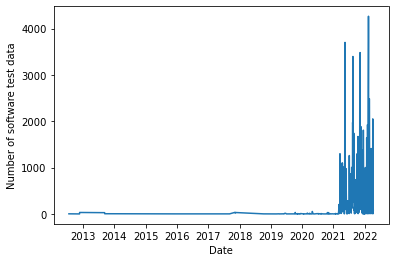

In [60]:
import matplotlib.pyplot as plt

plt.plot(date_distribution)
plt.xlabel('Date')
plt.ylabel('Number of software test data')
plt.show()

In [61]:
runtime_distribution = data.groupby('runtime').size()
runtime_distribution

runtime
00:00:00    4473
00:00:01    1590
00:00:02     210
00:00:03     338
00:00:04     428
            ... 
09:16:55       1
09:25:30       1
11:05:59       1
15:11:45       1
17:19:58       1
Length: 2274, dtype: int64

(0.0, 1700.0)

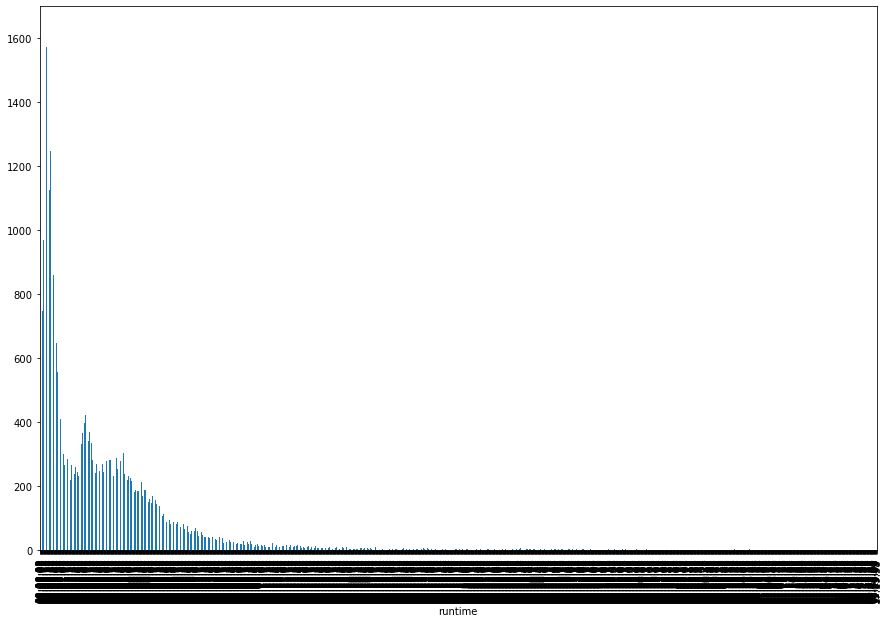

In [62]:
runtime_distribution.plot.bar(figsize = (15, 10))
plt.ylim([0,1700])

After the data is read in, we want to check, if all data types are set correct. As this is not the case, we set the correct types

In [63]:
data.dtypes

testname    object
result        bool
runtime     object
date        object
system      object
dtype: object

Now we check if there are any null values

In [64]:
data.isna().any()

testname    False
result      False
runtime     False
date        False
system      False
dtype: bool

In order to make the table more readable, we use symbols for passed/failed tests

In [65]:
data['result'].loc[(data['result'] == True)] = '🔵 Passed'
data['result'].loc[(data['result'] == False)] = '🔴 Failed'
data.head()

C:\Users\gaert\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,testname,result,runtime,date,system
22,03_Bestandspartner_Kundenportal Erstanmeldung,🔵 Passed,00:00:35,2022-04-12,VITALITY
23,02_Bestandspartner_Kundenportal Erstanmeldung,🔵 Passed,00:00:35,2022-04-12,VITALITY
24,01_Bestandspartner_Kundenportal Erstanmeldung,🔵 Passed,00:00:45,2022-04-12,VITALITY
36,!!!DAZ_Vitality_TZIT50_BuF_mit_VersBon_EV,🔴 Failed,00:04:18,2022-04-12,EVS
89,10_Bestandspartner_Kundenportal Erstanmeldung,🔵 Passed,00:00:40,2022-04-12,VITALITY


In [66]:
table_data = data[["testname", "result", "date", "runtime"]]
table_data.head()

,testname,result,date,runtime
22,03_Bestandspartner_Kundenportal Erstanmeldung,🔵 Passed,2022-04-12,00:00:35
23,02_Bestandspartner_Kundenportal Erstanmeldung,🔵 Passed,2022-04-12,00:00:35
24,01_Bestandspartner_Kundenportal Erstanmeldung,🔵 Passed,2022-04-12,00:00:45
36,!!!DAZ_Vitality_TZIT50_BuF_mit_VersBon_EV,🔴 Failed,2022-04-12,00:04:18
89,10_Bestandspartner_Kundenportal Erstanmeldung,🔵 Passed,2022-04-12,00:00:40


# Dashboard creation
Next we start building the dashboard.

In [67]:
app = Dash(__name__)

In [68]:
app.layout = html.Div([

    html.Div([
        html.H1("Software test results", style={'text-align': 'center'}),
    ], style={
        'padding-bottom': '1%',
        'padding-top': '1%',
        #'padding-left' : '3%',
        "background" : "#EAEAEA",
        "box-shadow": "0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19)"
        }),
    html.Br(),
    html.Br(),
    html.Div(children=[

    # Dropdown menue
        html.Div([
            html.Br(),
            dcc.Dropdown(
                id='dropdown', multi=True, clearable=False,
                options=[{'label': i, 'value': i} for i in data["system"].unique()],
                style = {
                    "width": "100%",
                    "box-shadow": "0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19)"
                    },
                placeholder="Select the systems you want to see details on...",
                #value= data["system"].unique()[0]
                        ),
        ], style = {
            'display': 'inline-block', 
            'padding-right': '5%',
            'padding-bottom' : '5%',
            'margin-left': '0',
            'margin-right': 'auto',
            'width' : '100%',
        }),

        # Datatable
        html.Div([
            html.Br(),
            html.H3('Details on conducted tests: ' , style = {'text-align': 'center'}),
            html.Br(),
            dash_table.DataTable(
                data.to_dict('records'), 
                id="datatable",
                columns= [
                    {"name": i, "id": i} 
                    if i == "testname" or i == "result" or i == "date"
                    else {"name": i, "id": i}
                    for i in table_data.columns],
                style_cell={
                    'textAlign': 'left',
                    'padding': '5px',
                    'font-family': 'Arial, Helvetica, sans-serif',
                    },
                style_header = {
                    'fontWeight': 'bold',
                    'border' : '1px solid black',
                    'backgroundColor' : 'rgb(224, 224, 224)',
                    'font-family': 'Arial, Helvetica, sans-serif',
                },
                style_data_conditional=[
                    {
                        'if' : {'row_index' : 'odd'},
                        'backgroundColor' : 'rgb(242, 243, 245)'
                    }
                ],
                sort_action="native",
                page_action='native',
                page_size=20, 
                style_table={'height': 1500, 'overflowY': 'auto'},
                fixed_rows={'headers': True},
                filter_action="native",
                 ),
        ], style = {
            'border': 'solid black 1.5px',
            'background' : '#5a6c8a',
            'display': 'float',
            'float' : 'right',
            'padding-left' : '7%',
            'padding-right' : '2%',
            'padding-bottom' :'3%',
            "width": "96%",
            "box-shadow": "0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19)"
            }),      
        html.Br(),

    # Dropdowns for the Boxplots

        html.Div([html.P(),
            html.H4('Date or Period of time 1'),
                dcc.Dropdown(id='boxplot_choice1', multi=False, clearable=False,
                        options=[{'label': i, 'value': i} for i in
                        data["date"].unique()],
                        value= data["system"].unique()[0],
                        style = {"box-shadow": "0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19)"}
                                ),
        ], style={
            "width": "46%", 
            'display': 'inline-block',
            'padding-bottom' : '5%',
            }),

        html.Div([html.P(),
            html.H4('Date or Period of time 2'),
                dcc.Dropdown(id='boxplot_choice2', multi=False, clearable=False,
                        options=[{'label': i, 'value': i} for i in
                        data["date"].unique()],
                        value= data["system"].unique()[0],
                        style = {"box-shadow": "0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19)"}
                                ),
                            
        ], style={
            "width": "46%", 
            'display': 'inline-block', 
            'padding-left': '5%',
            'padding-bottom' : '3%',
            'margin-left': '0',
            'margin-right': 'auto',
            }),

     # Boxplots
     html.Div([
        html.H3('Runtime per selected data frame ' , style = {'text-align': 'center'}),
        dcc.Graph(id='boxplot'),
     ], style = {
            'border': 'solid black 1.5px',
            'background' : '#5a6c8a',
            'display': 'float',
            'float' : 'right',
            'padding-left' : '7%',
            'padding-right' : '2%',
            'padding-bottom' :'3%',
            "width": "96%",
            "box-shadow": "0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19)"
            }
        ),

    ], style={
        "width": "52%",
        'font-family': 'Arial, Helvetica, sans-serif',
        'padding-left': '4%', 
        'display': 'float', 
        'float' : 'left',
        'padding-top': '1%',
        'margin-left': '0',
        'margin-right': 'auto',
        }),

   # Visualize number of conducted tests
    html.Div(children=[

        html.Div([
            html.Br(),
            html.H3('Number of conducted tests: ' , style = {'text-align': 'center'}),
            html.P(
            id='test_number',
            style = {'text-align': 'center', 'font-size' : '3.5em'},
            )
        ], style = {
            'border': 'solid black 1.5px',
            'background' : '#5a6c8a',
            "box-shadow": "0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19)"
            }
        ),
        html.Br(),
        html.Br(),
    # Piechart
        html.Div([
            html.Br(),
            html.H3('Percentage of passed and failed tests: ' , style = {'text-align': 'center'}),
            dcc.Graph(id='piechart', style={"height": "10%"}),
        ], style = {
            'border': 'solid black 1.5px',
            'background' : '#5a6c8a',
            "box-shadow": "0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19)"
            }
        ),
        html.Br(),
        html.Br(),
    # Linechart
        html.Div([
            html.Br(),
            html.H3('Passed test rate over time: ' , style = {'text-align': 'center'}),
            dcc.Graph(id='linechart')
        ], style = {
            'border': 'solid black 1.5px',
            'background' : '#5a6c8a',
            
            },
        ),

    ],style={
        "width": "40%", 
        'display': 'float',
        'float' : 'right',
        'font-family': 'Arial, Helvetica, sans-serif',
        'padding-top': '1%',
        'margin-left': 'auto',
        'margin-right': '0',
        #"background" : "#5a6c8a",
        #'border' : 'solid black 2px'
    }),
    
], style={
    "padding": "10px",
    'font-family': 'Arial, Helvetica, sans-serif',
})
 

In [69]:
@app.callback(
    [Output(component_id='test_number', component_property='children'),
    Output(component_id='boxplot', component_property='figure'),
    Output(component_id='piechart', component_property='figure'),
    Output(component_id='linechart', component_property='figure')],
    [Input(component_id='dropdown', component_property='value'),
    Input(component_id='boxplot_choice1', component_property='value'),
    Input(component_id='boxplot_choice2', component_property='value'),
    Input(component_id='datatable', component_property="derived_virtual_data")]
)

def update_data(option_slctd, date_choice1, date_choice2, all_rows_data):

    # Defining the three base data tables on which the graphs are built upon
    dff = pd.DataFrame(all_rows_data)
    #print('Data across all pages pre or post filtering: {}'.format(option_slctd)),
    #print('Data across all pages pre or post filtering: {}'.format(len(option_slctd)))

    if option_slctd == None:
        data_filtered = dff
    else:
        if len(option_slctd) != 0:
            data_filtered = dff.loc[dff['system'].isin(option_slctd)]
        else:
            data_filtered = dff
    
    boxplot_data = data_filtered
    boxplot_data['runtime'] = pd.to_datetime(data['runtime'], format= "%H:%M:%S", infer_datetime_format=True)

    dff_sub= data_filtered.groupby('result').size().reset_index(name='count')

    # Calculations for the % of passed tests per day 
    y = data_filtered.loc[(data_filtered['result'] == '🔵 Passed')]
    passed_per_day=[]
    grouped_per_day = []
    group_size = 2
    for i in data_filtered['date'].unique():
        passed_per_day.append((len(y.loc[data_filtered['date'] == i]))/len(data_filtered.loc[data_filtered['date'] == i])*100)
        passed_per_day.append(str(i))

    for i in range (0, len(passed_per_day), group_size):
        grouped_per_day.append(passed_per_day[i:i+group_size]) 

    data_passed_percentage = pd.DataFrame(grouped_per_day, columns = ['passed%', 'date'])
    data_passed_percentage

    number_of_tests = len(data_filtered)

    # Building the boxplots
    trace0 = go.Box(
        y=boxplot_data.loc[boxplot_data['date'] == str(date_choice1)]['runtime'].sort_values(), 
        name = date_choice1,
        marker = dict(
        color = 'rgb(44, 39, 117)'
        ),
        hoverinfo='none'
    )
    
    trace1 = go.Box(
        y= boxplot_data.loc[boxplot_data['date'] == str(date_choice2)]['runtime'].sort_values(),
        name = date_choice2,
        marker = dict(
        color = 'rgb(50, 173, 155)'
        ),
        hoverinfo='none'
    )
    data1 = [trace0,trace1]
    layout = go.Layout(  
        template='ggplot2',
        #labels = [date_choice1, date_choice2],
        #text = ["textA", "TextB", "TextC", "TextD"],
        #hovertemplate = "%{label}: <br>Runtime distribution: %{max}"
    )

    box_plot = go.Figure(data=data1,layout=layout)
    box_plot.update_layout(paper_bgcolor="#5a6c8a")

    # Building the piechart
    pie_chart=px.pie(
            data_frame=dff_sub,
            names='result',
            values='count',
            hole=.3,
            labels={'result':'count'}
            )
    pie_chart.update_layout(paper_bgcolor="#5a6c8a")
    # Building the line chart
    line_chart = px.line(
            data_frame=data_passed_percentage,
            x='date',
            y='passed%',
            #color= option_slctd
            #labels={'countriesAndTerritories':'Countries', 'dateRep':'date'},
            )
    line_chart.update_layout(hovermode="x unified", paper_bgcolor="#5a6c8a")
    line_chart.update_xaxes(rangeslider_visible=True)
    line_chart.update_traces(mode="markers+lines")

    return (number_of_tests, box_plot, pie_chart, line_chart)

In [70]:
if __name__ == '__main__':
    app.run_server(debug=False)
    

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [19/Apr/2022 10:50:44] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Apr/2022 10:50:44] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_3_0m1648480725.min.js HTTP/1.1" 200 -
127.0.0.1 - - [19/Apr/2022 10:50:44] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_3_0m1648480726.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [19/Apr/2022 10:50:44] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_3_0m1648480726.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [19/Apr/2022 10:50:44] "GET /_dash-component-suites/dash/html/dash_html_components.v2_0_2m1648480726.min.js HTTP/1.1" 200 -
127.0.0.1 - - [19/Apr/2022 10:50:44] "GET /_dash-component-suites/dash/dcc/dash_core_components-shared.v2_3_0m1648480726.js HTTP/1.1" 200 -
127.0.0.1 - - [19/Apr/2022 10:50:44] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v1_0_3m1648469654.min.js HTTP/1.1" 200 -
127.0.0.1 - - [

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\gaert\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\gaert\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\gaert\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\gaert\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\gaert\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\gaert\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\gaert\anaconda3\lib\site-packages\dash\dash.py", line 1345, in dispatch
    response.set_d

127.0.0.1 - - [19/Apr/2022 10:50:51] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [19/Apr/2022 10:51:10] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Apr/2022 10:51:44] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Apr/2022 10:51:45] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Apr/2022 10:51:53] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Apr/2022 10:52:15] "POST /_dash-update-component HTTP/1.1" 200 -
